<a href="https://colab.research.google.com/github/iammartian0/computer-vision/blob/main/Object_detection/German_Traffic_signs_detection_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:

Object detection plays a vital role in various domains, including the realm of traffic signs. Traffic signs serve as essential visual cues that guide and regulate vehicular and pedestrian movement on roads. Detecting and recognizing traffic signs in real-time is crucial for ensuring road safety, optimizing traffic flow, and providing assistance to drivers and autonomous vehicles.

Object detection in traffic signs involves the identification and localization of traffic signs within images or video frames. It enables automated systems to understand and interpret the information conveyed by these signs, contributing to intelligent transportation systems and advanced driver assistance systems (ADAS). By accurately detecting traffic signs, valuable insights can be gained to enhance road safety, optimize traffic management, and improve driver awareness.

Use Cases:

1. **Traffic Sign Recognition for Driver Assistance**: Object detection in traffic signs is pivotal for driver assistance systems. By detecting and recognizing traffic signs in real-time, these systems can provide timely alerts and warnings to drivers. For example, detecting speed limit signs allows the system to alert drivers if they are exceeding the posted speed limit, promoting safe driving behavior.

2. **Autonomous Vehicle Navigation and Compliance**: Object detection in traffic signs is crucial for autonomous vehicles to navigate and comply with traffic regulations. Autonomous vehicles rely on detecting and interpreting traffic signs, such as stop signs, yield signs, and traffic light signals, to make informed decisions about vehicle control and maneuvering.

3. **Traffic Analysis and Congestion Management**: Object detection in traffic signs enables the collection of valuable data for traffic analysis and management. By detecting and tracking traffic signs, authorities can gain insights into traffic patterns, monitor compliance with road regulations, and optimize traffic flow. This information can be used to implement effective traffic management strategies, reduce congestion, and enhance overall road efficiency.

4. **Pedestrian Safety and Crosswalk Recognition**: Object detection in traffic signs also contributes to pedestrian safety. By accurately detecting and recognizing crosswalk signs and pedestrian crossing signs, advanced systems can provide alerts and warnings to drivers, ensuring the safety of pedestrians and encouraging responsible driving near pedestrian zones.

5. **Smart City Infrastructure and Maintenance**: Object detection in traffic signs supports the maintenance and management of smart city infrastructure. By automatically detecting and analyzing the condition of traffic signs, authorities can identify damaged or missing signs and take prompt action for repair or replacement, ensuring the effectiveness of the signage system and promoting road safety.

Conclusion:

Object detection in traffic signs plays a critical role in various aspects of road safety, driver assistance, and traffic management. By accurately detecting and recognizing traffic signs, intelligent systems can assist drivers, enable autonomous vehicles, optimize traffic flow, and enhance overall road safety. As technology advances, the application of object detection in traffic signs is expected to evolve further, contributing to safer and more efficient transportation systems.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 24.6MB/s]

2023-07-10 20:29:17.245398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 20:29:18.096785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 90.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 63.5ms
Speed: 0.7ms pre-process, 63.5ms inference, 305.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


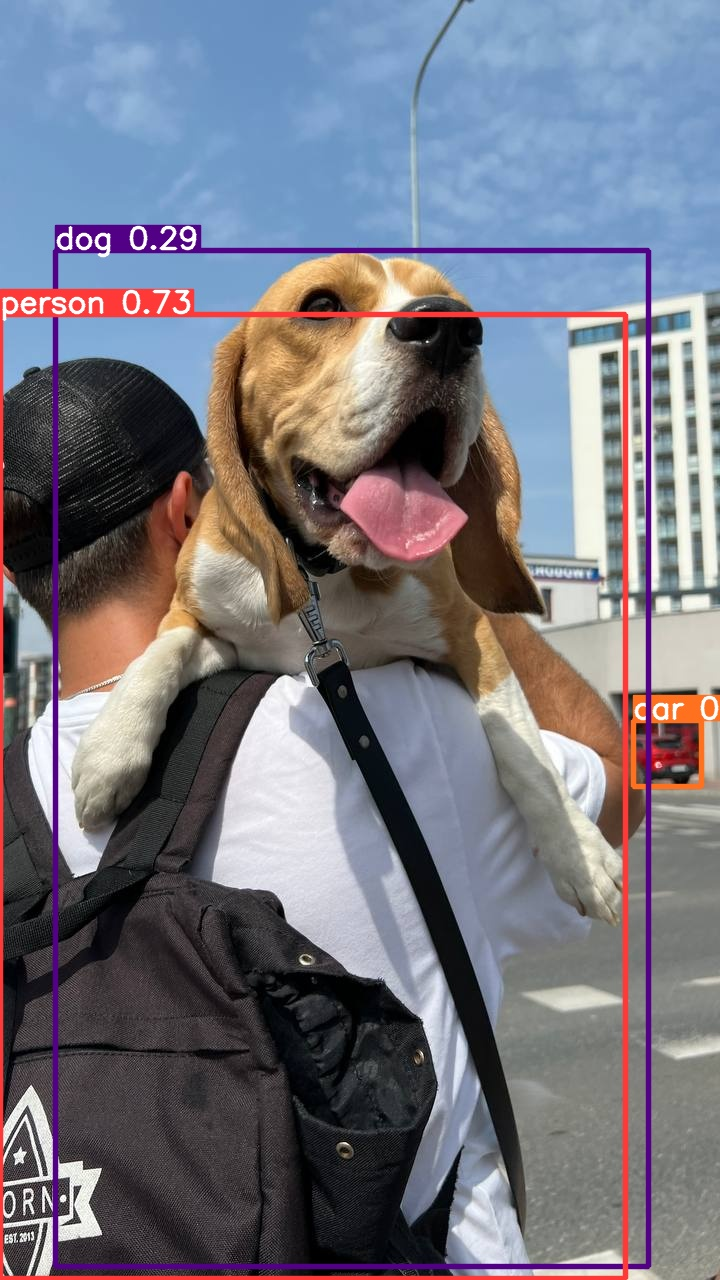

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00


In [ ]:


from roboflow import Roboflow
#enter your robo flow api key here
rf = Roboflow(api_key="----")
project = rf.workspace("mohamed-traore-2ekkp").project("gtsdb---german-traffic-sign-detection-benchmark")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to GTSDB---German-Traffic-Sign-Detection-Benchmark-3 in yolov8:: 100%|██████████| 2634/2634 [00:01<00:00, 1794.41it/s]


In [ ]:
dataset.location

'/content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=412 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 19.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=412, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxe

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1081.jpg
confusion_matrix.png				    train_batch1082.jpg
events.out.tfevents.1689021607.0aefe09e8cf2.3707.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1080.jpg				    weights


/content


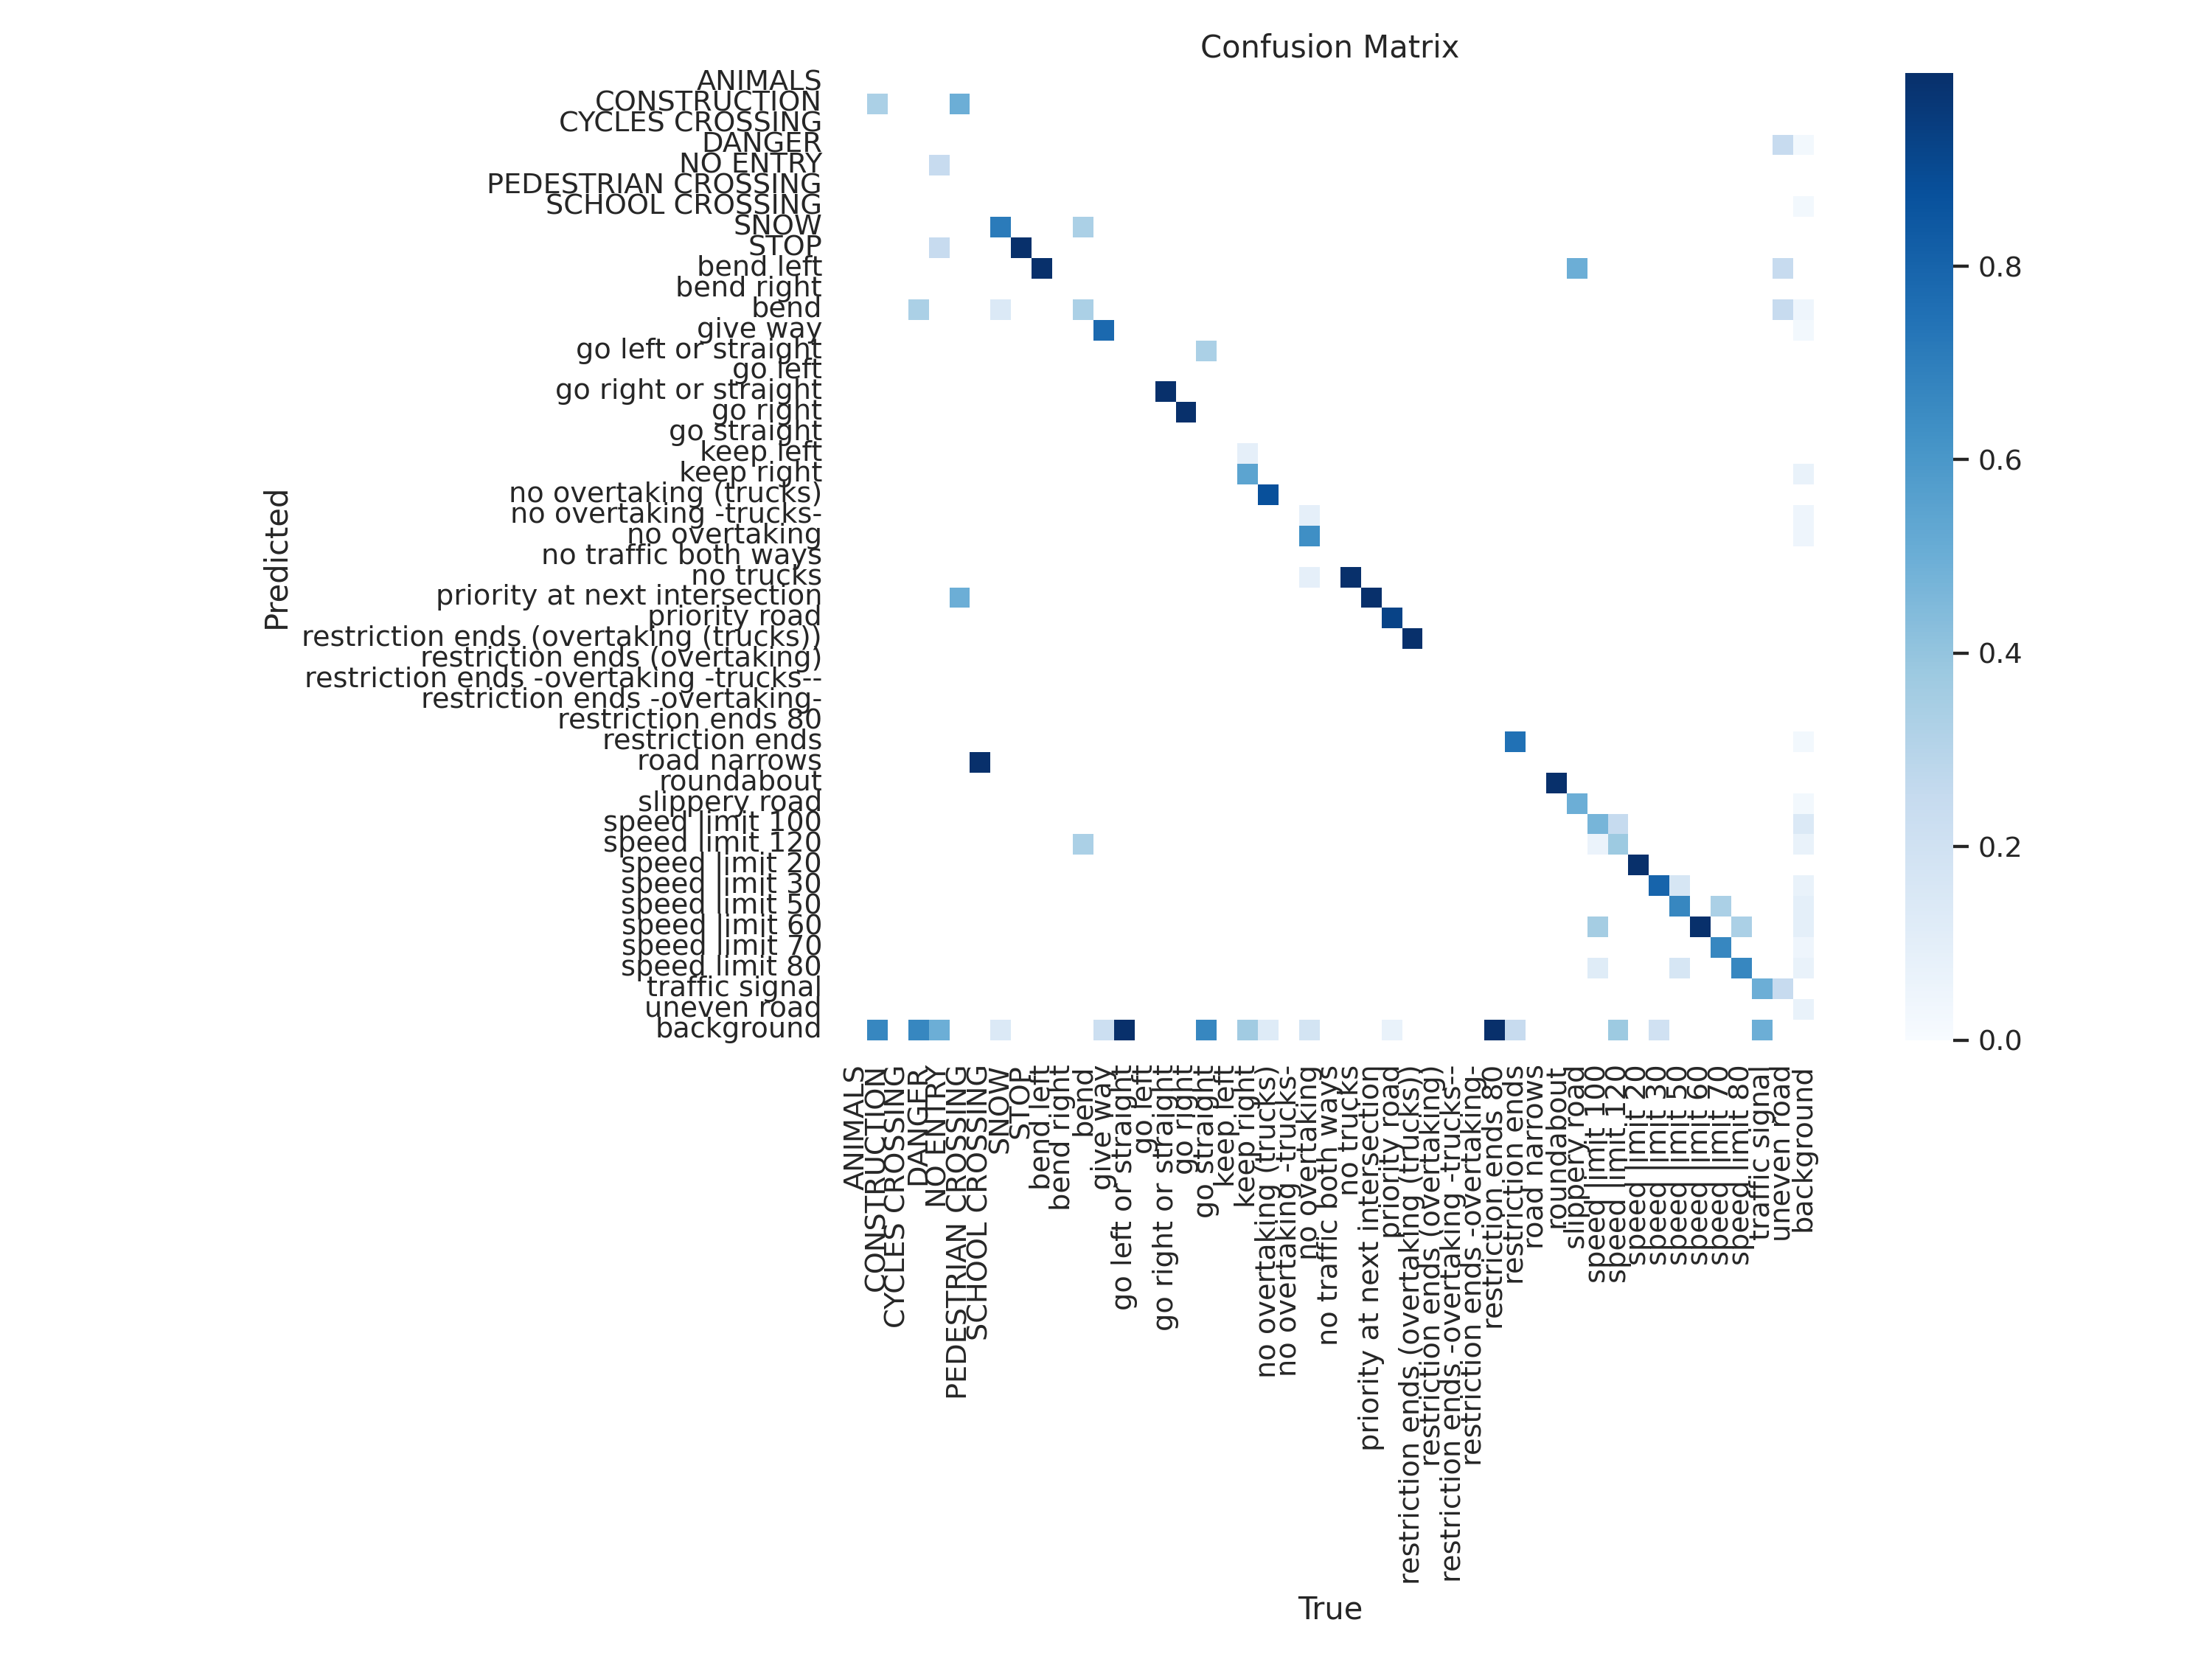

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


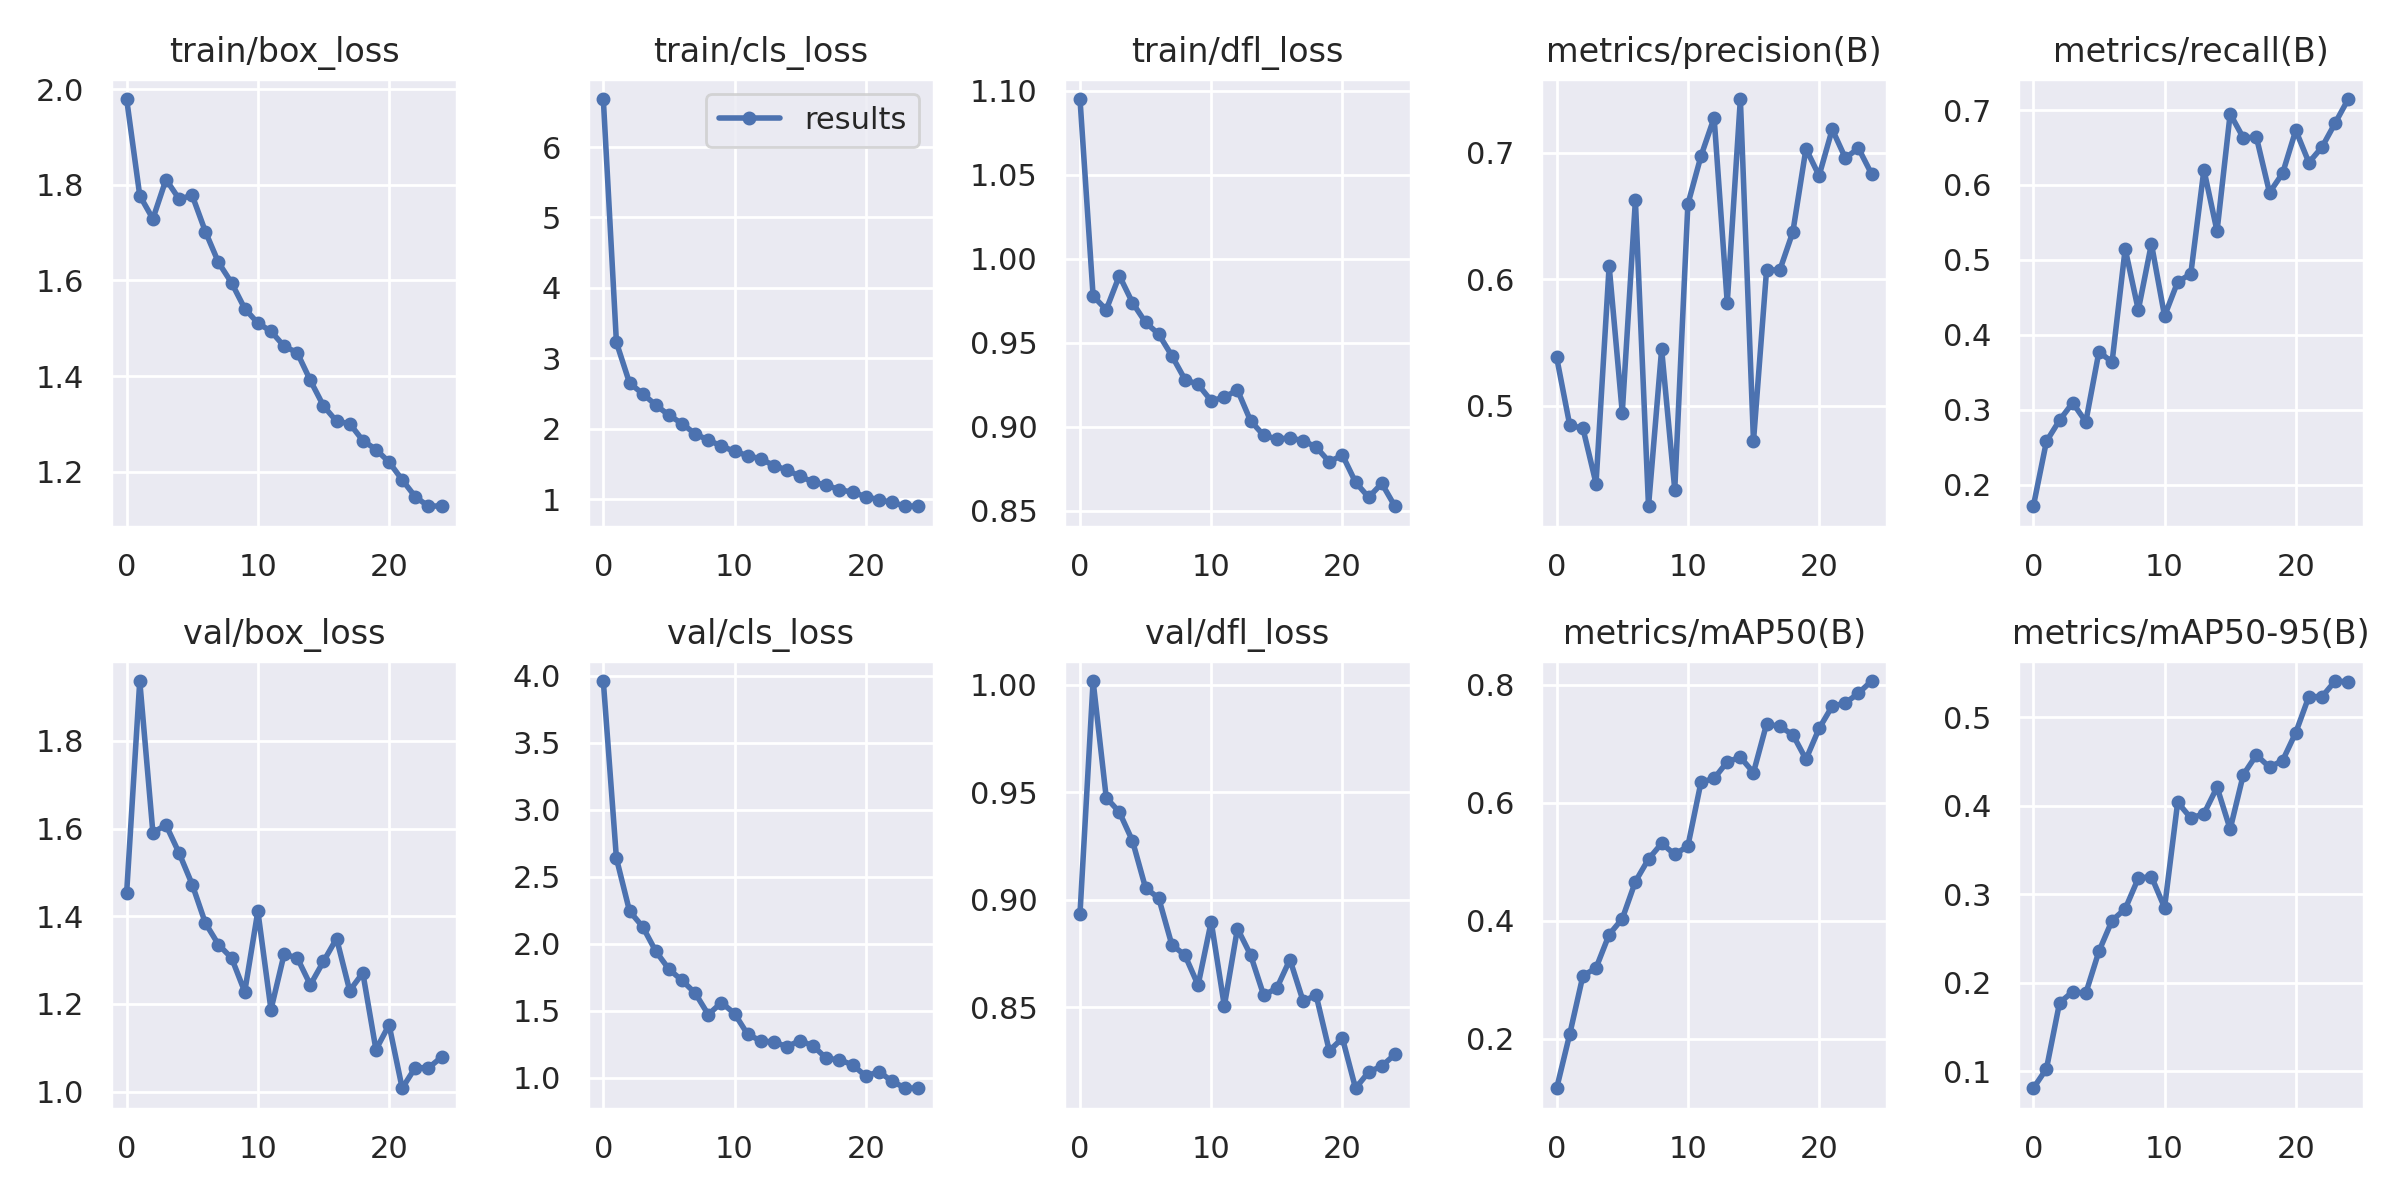

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


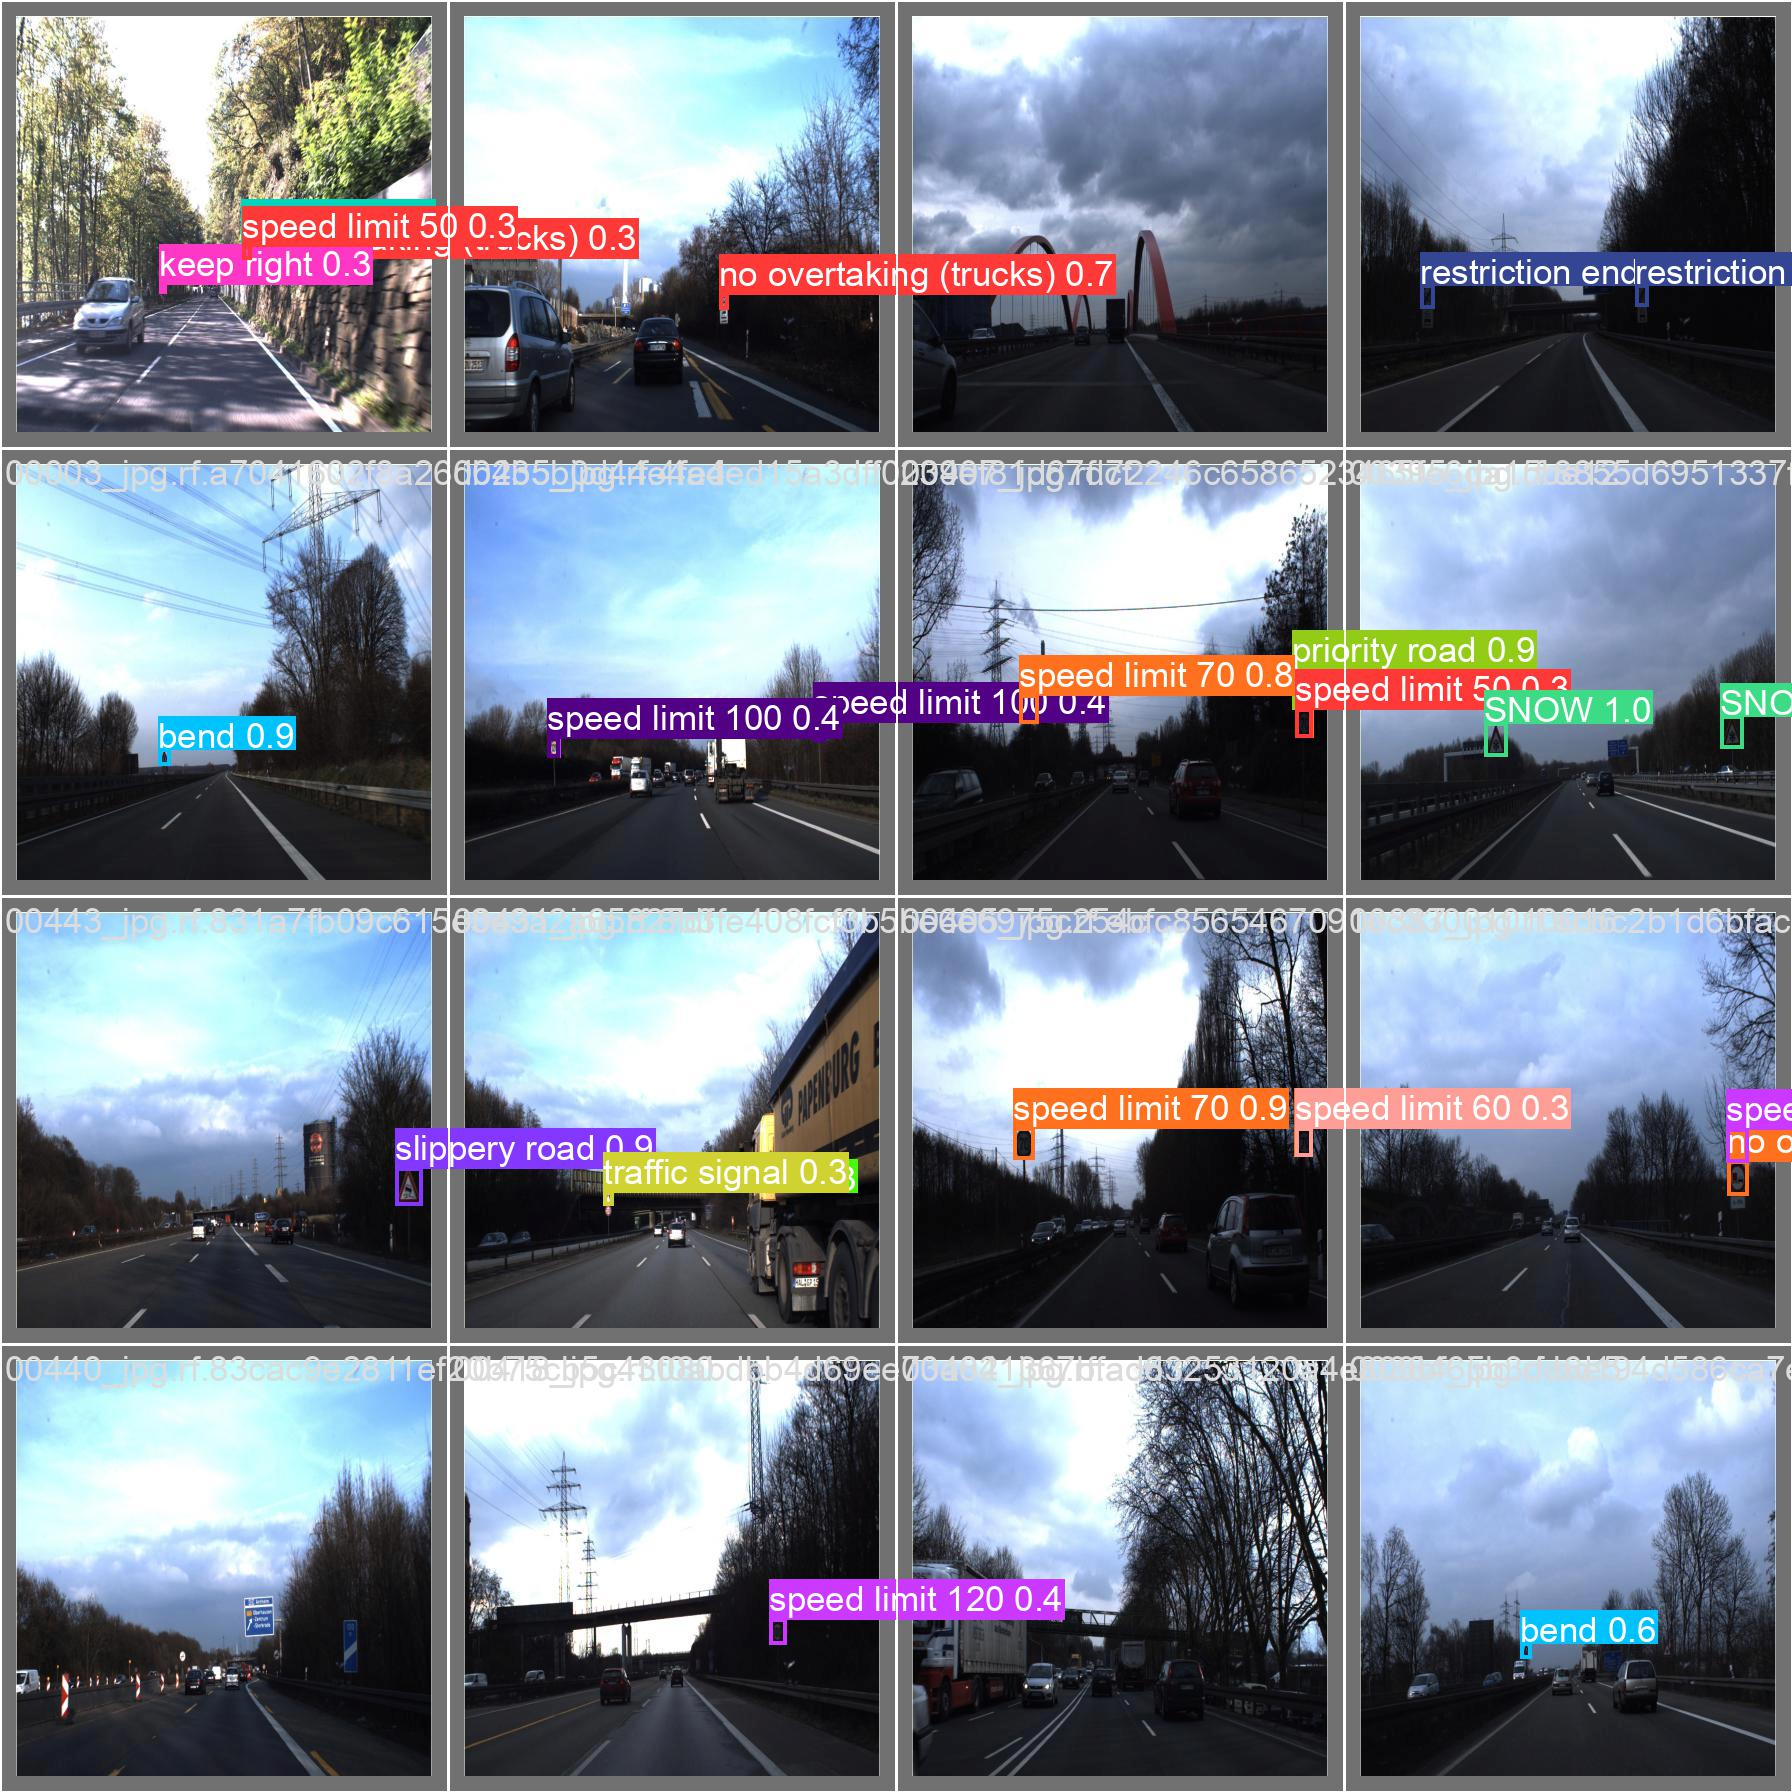

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=4800)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-10 21:02:18.950518: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/valid/labels.cache... 108 images, 6 backgrounds, 0 corrupt: 100% 108/108 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.72it/s]
                   all        108        170      0.684      0.714      0.806      0.545
          CONSTRUCTION        108          3      0.609      0.551       0.83      0.566
                DANGER        108          3     0.0789     0.0789      0.292     0.0982
              NO ENTRY        108          4      0.598       0.25      0.585      0.372
   PEDESTRIAN CROSSING        108          2   

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-10 21:03:27.311621: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs
image 1/54 /content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00026_jpg.rf.4c55e8a72c668d5a0c4a948580757cd9.jpg: 416x416 1 speed limit 30, 10.6ms
image 2/54 /content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00028_jpg.rf.975675b221390ef694e07dfa6eca3bea.jpg: 416x416 1 CONSTRUCTION, 10.8ms
image 3/54 /content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00032_jpg.rf.36c53d3b779076659978df5719da5b39.jpg: 416x416 1 give way, 1 go left or straight, 1 roundabout, 10.6ms
image 4/54 /content/datasets/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00041_jpg.rf.b6ba02dfdcd60a59334e5f24efaea448.jpg: 416

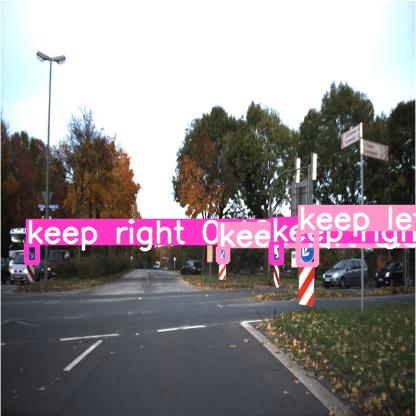

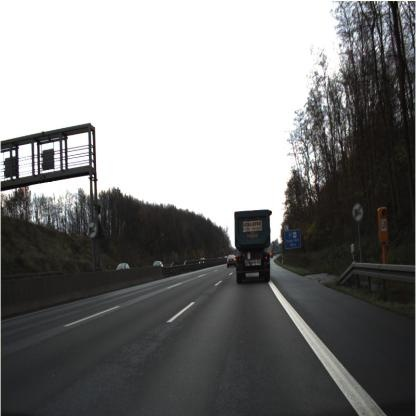

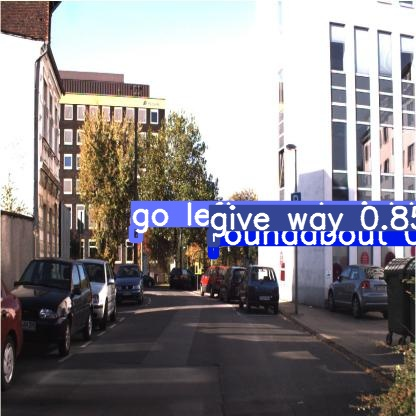

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=1000))
      print("\n")